## Homework 7

NaiveElasticNet


In [2]:
# %% load Libraries
import pandas as pd
import numpy as np
# visualization

import matplotlib.pyplot as plt

#models
from modules.LassoRegressionClass import *
from modules.NaiveElasticRegressionClass import *
from modules.ElasticNetRegressionClass import *

#pipelines and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 

#only to compare the results
from sklearn import linear_model

In [3]:
## Testing Class LassoRegression with the dataset cancer of prostata

# %% Load Data
df_prosate = pd.read_csv('homeworks/data/prostate.csv')



     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564


In [20]:
print(df_prosate.columns)

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')


In [4]:
#% Select data for the model
X = df_prosate.iloc[:, :-1]
y = df_prosate.iloc[:, -1]

# %% Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# %% Setting the parameters for testing 

# weights of the penalities l1, l2

lambda_l1_penality = 0.1

lambda_l2_penality = 0.5  

# parameters to the optimization

max_iterations=10000

threshold=1e-7


In [8]:
# Training the Model with Lasso Regression
lasso_reg = LassoRegression(lambda_l1_penality,max_iterations=max_iterations,threshold=threshold)

# definition of pipeline
my_pipeline_lasso = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lasso_reg', lasso_reg),
])

# fitting the model lasso

my_pipeline_lasso.fit(X_train, y_train)
print('Lasso Coefficients :',my_pipeline_lasso.named_steps['lasso_reg'].coef_)



Lasso Coefficients : [0.55424818 0.18015268 0.         0.         0.20134953 0.
 0.         0.        ]


In [9]:
## Training Lasso from Scikit
lasso_scikit_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', linear_model.Lasso(alpha=lambda_l1_penality, random_state=0))
])

lasso_scikit_pipeline.fit(X_train, y_train)
lasso_coef = lasso_scikit_pipeline.named_steps['lasso'].coef_
print('Coefficients Lasso by Scikit:',lasso_coef)

Coefficients Lasso by Scikit: [ 0.55429963  0.18014342 -0.          0.          0.20130566  0.
  0.          0.        ]


In [10]:
#%% Metric MSE  in the  model Lasso and Lasso with Scikit

y_predict_my_lasso = lasso_reg.predict(X_test)

print("MSE (Lasso Implementation):",mean_squared_error(y_predict_my_lasso,y_test))

y_predict_scikit = lasso_scikit_pipeline.predict(X_test)

print("MSE (Lasso Scikit):",mean_squared_error(y_predict_scikit,y_test))

MSE (Lasso Implementation): 1.4548712491160205
MSE (Lasso Scikit): 0.44745220122718876


In [11]:
## Similarity between vector of solutions

cosine_similarity = np.dot(my_pipeline_lasso.named_steps['lasso_reg'].coef_, lasso_coef) / (np.linalg.norm(my_pipeline_lasso.named_steps['lasso_reg'].coef_) * np.linalg.norm(lasso_coef))

print("Similitud of solutions:",cosine_similarity)

Similitud of solutions: 0.9999999949971066


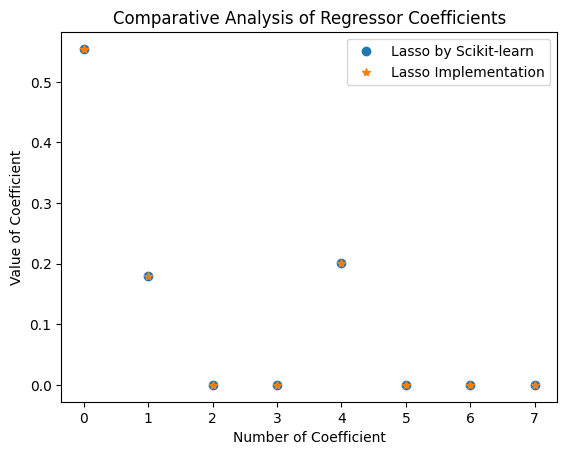

In [12]:
## Visualization of Coefficients Lasso Scikit vs Lasso Implementation

plt.plot(lasso_coef, 'o', label='Lasso by Scikit-learn')
plt.plot(my_pipeline_lasso.named_steps['lasso_reg'].coef_, '*', label='Lasso Implementation')
plt.title("Comparative Analysis of Regressor Coefficients")
plt.xlabel('Number of Coefficient')
plt.ylabel('Value of Coefficient')
plt.legend()
plt.savefig('test_lasso_regression.png')
plt.show()

In [13]:
## Testin Implementation Naive Elastics Regression
naive_elastic_reg = NaiveElasticRegression(lambda_l1_penality,lambda_l2_penality,max_iterations=max_iterations,threshold=threshold)

# Make a pipeline

my_naive_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('naive_reg', naive_elastic_reg),
])

# fitting the model
my_naive_pipeline.fit(X_train, y_train)
print('Coeficientes with Naive:',my_naive_pipeline.named_steps['naive_reg'].coef_)

Coeficientes with Naive: [0.54563103 0.17206707 0.         0.         0.19580138 0.
 0.         0.        ]


In [14]:
## Testing ElasticNetRegression

model_elasticnet = ElasticNetRegression(lambda_l1_penality,lambda_l2_penality,max_iterations=max_iterations, threshold=threshold)

my_elasticnet_pipeline = Pipeline(
    [
        ('std_scaled',StandardScaler()),
        ('model_elasticnet',model_elasticnet)   
    ])

my_elasticnet_pipeline.fit(X_train,y_train)
print('Coefficients elasticnet',my_elasticnet_pipeline.named_steps['model_elasticnet'].coef_)

Coefficients elasticnet [0.81844655 0.2581006  0.         0.         0.29370208 0.
 0.         0.        ]


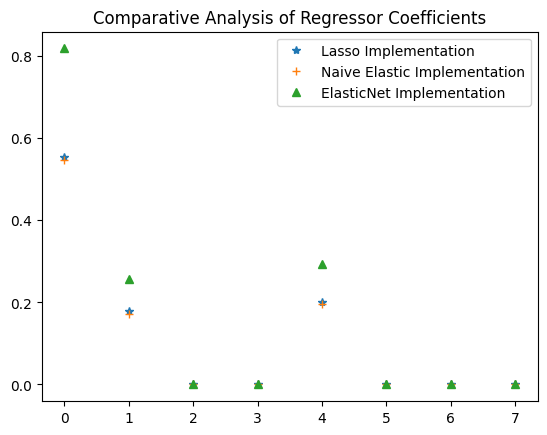

In [15]:
## Visualization of the coeficients

plt.plot(my_pipeline_lasso.named_steps['lasso_reg'].coef_, '*', label='Lasso Implementation')
plt.plot(my_naive_pipeline.named_steps['naive_reg'].coef_, '+', label='Naive Elastic Implementation')
plt.plot(my_elasticnet_pipeline.named_steps['model_elasticnet'].coef_,'^',label='ElasticNet Implementation')

plt.title("Comparative Analysis of Regressor Coefficients")
plt.legend()
plt.savefig('comparative_coefficients_regression.png')
plt.show()




## Cross Validation

The cross validation is the method for tunning the parameters $\lambda_1, \lambda_2$, using ($\lambda_2,s$), when $s$ is proportional to $\lambda$


In [16]:
# %% Libraries for cross validation

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [28]:
# %% Parameters of cross validation
## setting lambda
lambda_l2_penality = 1000

#axis x definition
s_values = np.linspace(0,1,20)

# cross validation
kf = KFold(n_splits=10)


In [29]:

rows_list = []

for s in s_values:
    l1_penalty = s * lambda_l2_penality
    fold_errors = []
    best_error = np.inf
    best_coefs = None
    for train_index, val_index in kf.split(X_train):
        # Obtener los datos de entrenamiento y validación para esta iteración
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
        model = ElasticNetRegression(lambda_l1_penality=l1_penalty, lambda_l2_penality=lambda_l2_penality)
        
        model.fit(X_train_fold, y_train_fold)
        
            
        
        y_val_pred = model.predict(X_val_fold)
        
        error = mean_squared_error(y_val_fold, y_val_pred)

        if error < best_error:
            best_error = error
            best_coefs = model.coef_
    row_coefficients = model.coef_
    rows_list.append(row_coefficients)
        
        
        
    

In [30]:
columns =['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
df_betas = pd.DataFrame(rows_list, columns=columns)
df_betas['s_values'] = s_values
print(df_betas.head())

     lcavol  lweight        age      lbph       svi       lcp   gleason  \
0  0.297424  0.62061  10.659085  0.046312  0.054753  0.030779  1.128181   
1  0.000000  0.00000   0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.00000   0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.00000   0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.00000   0.000000  0.000000  0.000000  0.000000  0.000000   

      pgg45  s_values  
0  4.358965  0.000000  
1  0.000000  0.052632  
2  0.000000  0.105263  
3  0.000000  0.157895  
4  0.000000  0.210526  


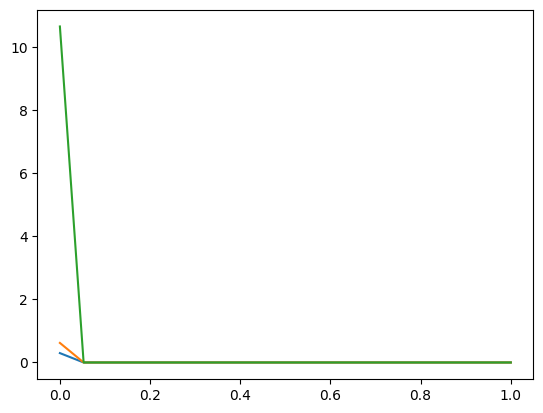

In [33]:
plt.plot(df_betas['s_values'],df_betas['lcavol'],label='lcavol')
plt.plot(df_betas['s_values'],df_betas['lweight'],label='lweight')
plt.plot(df_betas['s_values'],df_betas['age'],label='age')
plt.show()

In [27]:


# define s
s_values = np.linspace(0,1,20)

list_lambda2_values = [0.1,1.0,10,100,1000]

results ={}

kf = KFold(n_splits=10)


for lambda2 in list_lambda2_values:
    errors = []
    for s in s_values:
        l1_penalty = s * lambda2
        fold_errors = []
        
        for train_index, val_index in kf.split(X_train):
            # Obtener los datos de entrenamiento y validación para esta iteración
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            model = ElasticNetRegression(lambda_l1_penality=l1_penalty, lambda_l2_penality=lambda2)
            model.fit(X_train_fold, y_train_fold)
            
            y_val_pred = model.predict(X_val_fold)
            error = mean_squared_error(y_val_fold, y_val_pred)
            fold_errors.append(error)
        
        errors.append(np.mean(fold_errors))
    
    results[lambda2] = errors




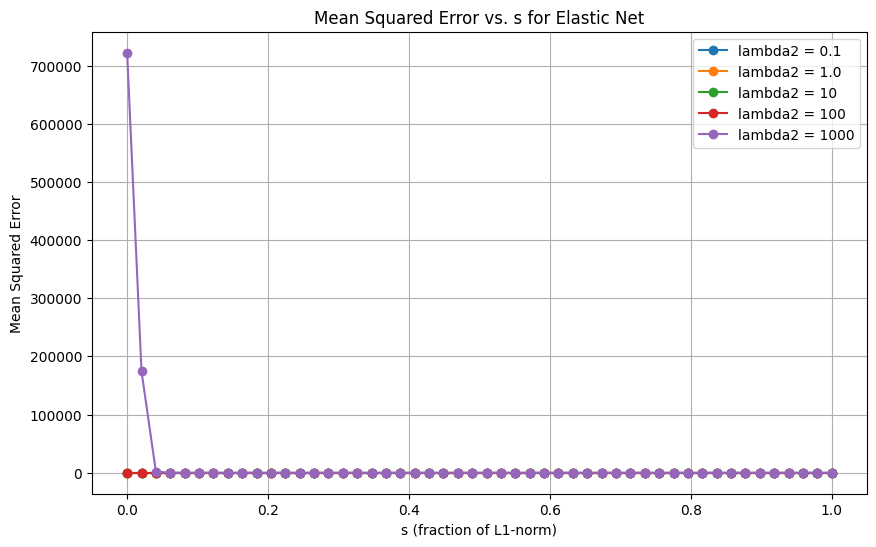

In [17]:
# Plotting the mean squared error against s for different lambda2 values
plt.figure(figsize=(10, 6))
for lambda2 in list_lambda2_values:
    plt.plot(s_values, results[lambda2], marker='o', label=f'lambda2 = {lambda2}')
plt.xlabel('s (fraction of L1-norm)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. s for Elastic Net')
plt.legend()
plt.grid(True)
plt.show()

